In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, FuncAnimation
G = 6.67430e-11

In [11]:
from Nbody import CelestialBody, System

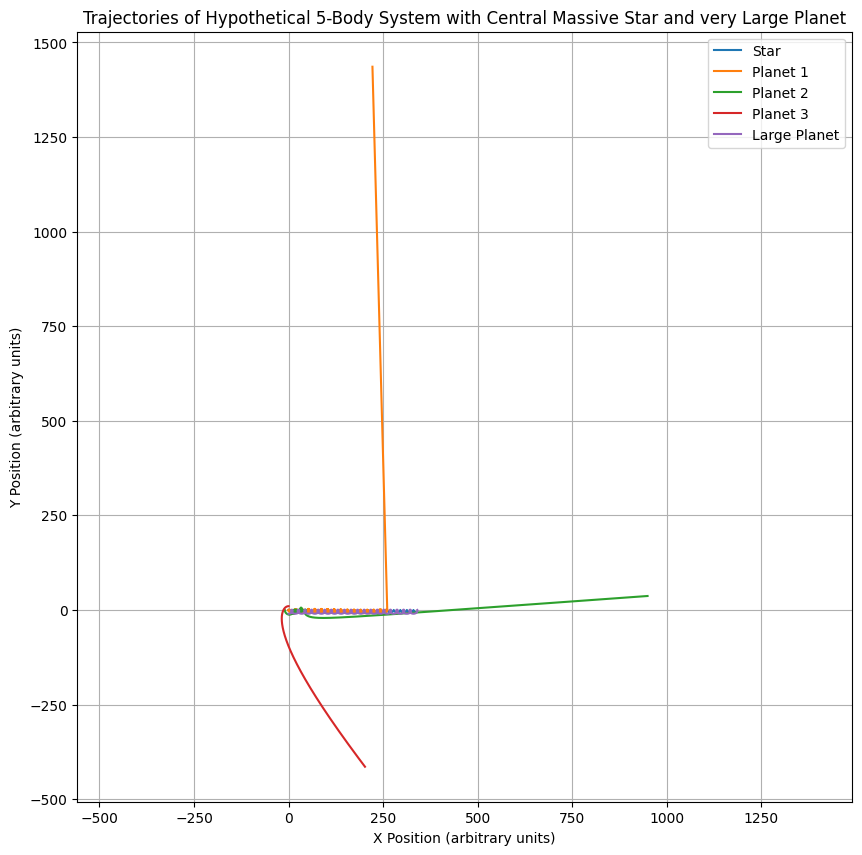

In [12]:
central_massive_body_system = System()

# Star
mass_star = 1e12
position_star = [0, 0, 0]
velocity_star = [0, 0, 0]
star = CelestialBody(mass_star, position_star, velocity_star)
central_massive_body_system.add_body(star)

mass_planet1 = 10000.0
position_planet1 = [3, 0, 0]
velocity_planet1 = [0, 3, 0]
planet1 = CelestialBody(mass_planet1, position_planet1, velocity_planet1)
central_massive_body_system.add_body(planet1)

mass_planet2 = 3000000.0
position_planet2 = [-10, 0, 0]
velocity_planet2 = [0, -3, 0]
planet2 = CelestialBody(mass_planet2, position_planet2, velocity_planet2)
central_massive_body_system.add_body(planet2)

mass_planet3 = 4000.0
position_planet3 = [0, 10, 0]
velocity_planet3 = [-3, 0, 0]
planet3 = CelestialBody(mass_planet3, position_planet3, velocity_planet3)
central_massive_body_system.add_body(planet3)

# Large planet
mass_planet4 = 600000000000.0
position_planet4 = [0, -10, 0]
velocity_planet4 = [3, 0, 0]
planet4 = CelestialBody(mass_planet4, position_planet4, velocity_planet4)
central_massive_body_system.add_body(planet4)

dt_central_massive_body = 0.01 
num_steps = 30000 

positions_star = [np.copy(star.position)]
positions_planet1 = [np.copy(planet1.position)]
positions_planet2 = [np.copy(planet2.position)]
positions_planet3 = [np.copy(planet3.position)]
positions_planet4 = [np.copy(planet4.position)]

for step in range(num_steps):
    central_massive_body_system.compute_interactions() 
    central_massive_body_system.update(dt_central_massive_body)
    central_massive_body_system.reset_forces()

    positions_star.append(np.copy(star.position))
    positions_planet1.append(np.copy(planet1.position))
    positions_planet2.append(np.copy(planet2.position))
    positions_planet3.append(np.copy(planet3.position))
    positions_planet4.append(np.copy(planet4.position))

positions_star = np.array(positions_star)
positions_planet1 = np.array(positions_planet1)
positions_planet2 = np.array(positions_planet2)
positions_planet3 = np.array(positions_planet3)
positions_planet4 = np.array(positions_planet4)

plt.figure(figsize=(10, 10))
plt.plot(positions_star[:, 0], positions_star[:, 1], label='Star')
plt.plot(positions_planet1[:, 0], positions_planet1[:, 1], label='Planet 1')
plt.plot(positions_planet2[:, 0], positions_planet2[:, 1], label='Planet 2')
plt.plot(positions_planet3[:, 0], positions_planet3[:, 1], label='Planet 3')
plt.plot(positions_planet4[:, 0], positions_planet4[:, 1], label='Large Planet')
plt.xlabel('X Position (arbitrary units)')
plt.ylabel('Y Position (arbitrary units)')
plt.legend()
plt.title('Trajectories of Hypothetical 5-Body System with Central Massive Star and very Large Planet')
plt.grid(True)
plt.axis('equal')
plt.show()

In [39]:
fig, ax = plt.subplots()

ax.set_aspect('equal')

s1 = ax.plot([], [], 'b.', label='Star')[0]
p1 = ax.plot([], [], 'r.', label='Planet 1')[0]
p2 = ax.plot([], [], 'g.', label='Planet 2')[0]
p3 = ax.plot([], [], 'y.', label='Planet 3')[0]
s2 = ax.plot([], [], 'm.', label='Large Planet')[0]

ax.set_xlim(-15, 20)
ax.set_ylim(-20, 20)
ax.legend()

def init():
    s1.set_data([], [])
    p1.set_data([], [])
    p2.set_data([], [])
    p3.set_data([], [])
    s2.set_data([], [])
    return s1, p1, p2, p3, s2

def update(frame):
    if frame == 1200:
        ax.set_xlim(-15, 100)
        ax.set_ylim(-100, 20)
    if frame == 3000:
        ax.set_xlim(50, 150)
        ax.set_ylim(-20, 20)

    s1.set_data(positions_star[frame, 0], positions_star[frame, 1])
    p1.set_data(positions_planet1[frame, 0], positions_planet1[frame, 1])
    p2.set_data(positions_planet2[frame, 0], positions_planet2[frame, 1])
    p3.set_data(positions_planet3[frame, 0], positions_planet3[frame, 1])
    s2.set_data(positions_planet4[frame, 0], positions_planet4[frame, 1])
    return s1, p1, p2, p3, s2

anim = FuncAnimation(fig, update, frames=5000, blit=True, init_func=init)
anim.save('chaotic_orbits.mp4', writer=FFMpegWriter(fps=300)) 

plt.close(fig)

/tmp/ipykernel_8376/46475671.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  s1.set_data(positions_star[frame, 0], positions_star[frame, 1])
/tmp/ipykernel_8376/46475671.py:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p1.set_data(positions_planet1[frame, 0], positions_planet1[frame, 1])
/tmp/ipykernel_8376/46475671.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p2.set_data(positions_planet2[frame, 0], positions_planet2[frame, 1])
/tmp/ipykernel_8376/46475671.py:34: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p3.set_data(positions_planet3[frame, 0], positions_planet3[frame, 1])
/tmp/ipykernel_8376/46475671.p